# 深圳各区二手房指导价明细与汇总

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import re

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Line, Kline
%matplotlib inline

In [5]:
print(os.path.exists('./txt/szhouse.txt'))

True


## 获取数据

将文本格式的深圳二手房指导价，整理为二维表

In [6]:
data_list = []

In [7]:
with open('./txt/szhouse.txt', mode='r', encoding='utf-8') as file:
    lines = [line for line in file.readlines() if len(line.strip()) > 0 and 
             not line.strip().startswith('-')]

In [8]:
print(len(lines))

17975


In [9]:
print(lines[0:50])

['1\n', '罗湖\n', '黄贝\n', '安业花园\n', '45000\n', '2\n', '罗湖\n', '黄贝\n', '安业馨园\n', '56000\n', '3\n', '罗湖\n', '黄贝\n', '碧波花园\n', '50500\n', '4\n', '罗湖\n', '黄贝\n', '碧中园\n', '51600\n', '5\n', '罗湖\n', '黄贝\n', '赤龙坑住宅楼\n', '51400\n', '6\n', '罗湖\n', '黄贝\n', '大澎花园\n', '46400\n', '7\n', '罗湖\n', '黄贝\n', '丹枫白露苑\n', '40900\n', '8\n', '罗湖\n', '黄贝\n', '电视台宿舍\n', '51100\n', '9\n', '罗湖\n', '黄贝\n', '东方都会大厦\n', '53000\n', '10\n', '罗湖\n', '黄贝\n', '东湖大厦\n', '41100\n']


数据顺序为：序号、行政区、街道、小区名称、指导价格

## 清洗与整理数据

In [10]:
data = {}
for index, line in enumerate(lines):
    if index % 5 == 0:
        if len(list(data.keys())) > 0:
            data_list.append(data)
            data = {}
        try:
            data['id'] = int(line)
        except:
            data['id'] = None
    if index % 5 == 1:
        data['district'] = line.strip()
    if index % 5 == 2:
        data['street'] = line.strip()
    if index % 5 == 3:
        data['subdivision'] = line.strip()
    if index % 5 == 4:
        try:
            data['price'] = int(line.strip())
        except:
            data['price'] = None
print(len(data_list))

3594


In [11]:
house_data = pd.DataFrame(data_list)

In [12]:
house_data.head()

,id,district,street,subdivision,price
0,1,罗湖,黄贝,安业花园,45000
1,2,罗湖,黄贝,安业馨园,56000
2,3,罗湖,黄贝,碧波花园,50500
3,4,罗湖,黄贝,碧中园,51600
4,5,罗湖,黄贝,赤龙坑住宅楼,51400


## 过滤数据

In [13]:
list(set(house_data['district']))

['罗湖', '光明', '龙华', '宝安', '南山', '福田', '大鹏', '坪山', '盐田', '龙岗']

In [14]:
nanshan = house_data[house_data['district']=='南山']

In [15]:
nanshan.head()

,id,district,street,subdivision,price
1429,1430,南山,南头,缤纷年华家园,104000
1430,1431,南山,南头,彩虹居,60000
1431,1432,南山,南头,常丰花园,50000
1432,1433,南山,南头,常兴广场,60900
1433,1434,南山,南头,常兴苑,51400


## 统计数据

In [16]:
describe = house_data['price'].describe()
dict_describe = {'item': describe.index, 'value': describe.values}
df_describe = pd.DataFrame(dict_describe)
df_describe

,item,value
0,count,3594.000000
1,mean,61330.050083
2,std,22407.423764
3,min,16100.000000
4,25%,45000.000000
5,50%,56600.000000
6,75%,73500.000000
7,max,132000.000000


### 求各区指导价均值

In [17]:
district_mean = house_data.groupby('district').mean()

In [18]:
district_mean[['price']]

,price
district,
光明,45740.000000
南山,82748.640916
坪山,33660.526316
大鹏,32039.285714
宝安,58260.372960
盐田,42922.289157
福田,74946.592490
罗湖,53829.436620
龙华,54604.128440


### 根据均价降序排序

In [19]:
district_mean.sort_values('price', ascending=False)[['price']]

,price
district,
南山,82748.640916
福田,74946.592490
宝安,58260.372960
龙华,54604.128440
罗湖,53829.436620
光明,45740.000000
盐田,42922.289157
龙岗,41117.594255
坪山,33660.526316


### 绘制柱状图

In [20]:
#设置行不限制数量
pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns',None)

#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [21]:
# 支持中文显示
rc = {'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', font='SimHei', rc=rc)

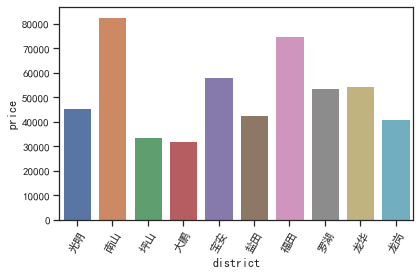

In [22]:
sns.barplot(x=district_mean.index, y='price', data=district_mean)
# 旋转X轴文本为90度
plt.xticks(plt.xticks()[0], district_mean.index, rotation=60)
plt.tight_layout()
plt.show()

In [23]:
if not os.path.exists('./excel/'):
    os.makedirs('./excel/')

In [24]:
group_summary = house_data['price'].groupby(house_data['district']).describe()

In [25]:
import time
try:
    excel_name = 'shenzhen_house_{0}.xlsx'.format(
        time.strftime('%Y%m%d%H%M%S', time.localtime(time.time())))
    if not os.path.exists('./excel/'):
        os.makedirs('./excel/')
    excel_filepath = os.path.join('./excel/',
                                  excel_name)
    write = pd.ExcelWriter(excel_filepath)
    house_data.to_excel(write,
                        sheet_name='details',
                        index=False,
                        encoding='utf-8')
    df_describe.to_excel(write,
                         sheet_name='summary',
                         index=False,
                         encoding='utf-8')
    group_summary.to_excel(write,
                           sheet_name='district_summary',
                           index=True,
                           encoding='utf-8')
    write.save()
except Exception as e:
    print(e)